# 분해 (Decomposition)
* 큰 하나의 행렬을 여러개의 작은 행렬로 분해
* 분해 과정에서 중요한 정보만 남게됨

## 데이터 불러오기 및 시각화

In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
import seaborn as sns
import warnings

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.pipeline import make_pipeline, Pipeline # 개체도가져온것
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn import random_projection

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF,LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [3]:
def plot_iris(iris, label):
    plt.figure()
    colors = ['navy', 'purple', 'red']
    for xy, label in zip(iris, label):
        plt.scatter(xy[0], xy[1], color=colors[label])
        

In [4]:
def show_faces(faces):
    plt.figure()
    num_rows, num_cols= 2, 3
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(np.reshape(faces[i], (64, 64)), cmap=plt.cm.gray)

In [5]:
iris.shape

(150, 4)

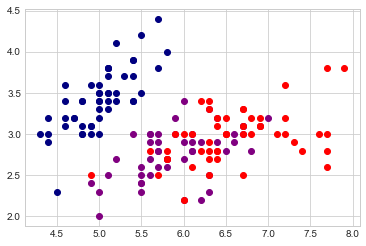

In [6]:
plot_iris(iris[:, :2], labels)

In [7]:
faces.shape

(400, 4096)

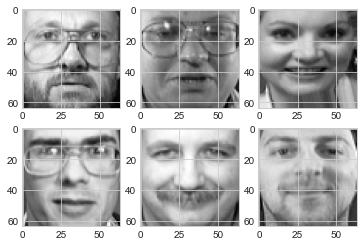

In [8]:
show_faces(faces)

## Principal Component Analysis (PCA)

* PCA를 사용해 iris 데이터 변환
* $150 \times 4$ 크기의 데이터를 $150 \times 2$ 크기의 행렬로 압축

In [9]:
model = PCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

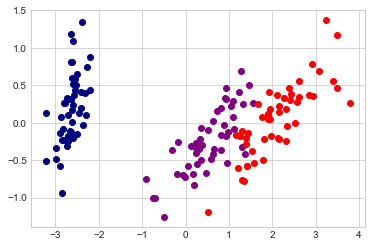

In [10]:
plot_iris(transformed_iris, labels)

* PCA를 통해 학습된 각 컴포넌트 (6개)
* 각 컴포넌트는 얼굴의 주요 특징을 나타냄

In [11]:
model = PCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

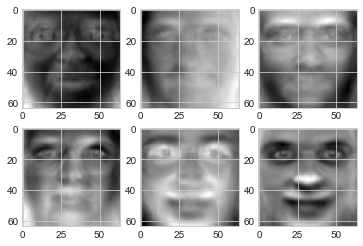

In [12]:
show_faces(faces_components)

## Incremental PCA

* PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
* Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
* 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용

In [13]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape
                       

(150, 2)

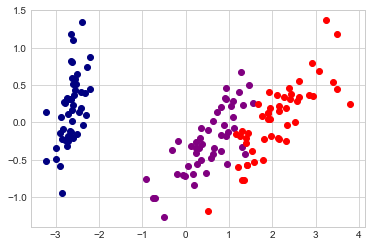

In [14]:
plot_iris(transformed_iris,labels)

In [15]:
model = IncrementalPCA(n_components= 2*3)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

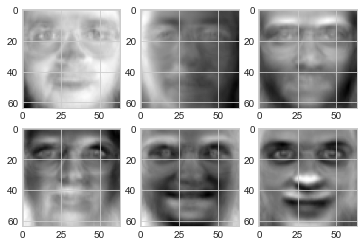

In [16]:
show_faces(faces_components)

## Kernel PCA

* 차원 축소를 위한 복잡한 비선형 투형

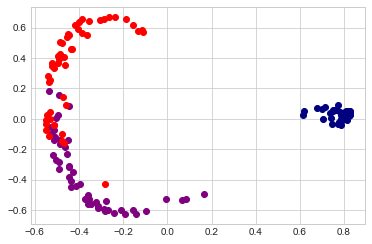

In [17]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

In [18]:
model = KernelPCA(n_components= 2*3, kernel='rbf', random_state=0)
model.fit(faces)
#kernel pca에서는 아래 components가 없음
#faces_components = model.components_
faces_components.shape

(6, 4096)

## Sparse PCA

* PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형결합으로 나타난다는 점
* 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복

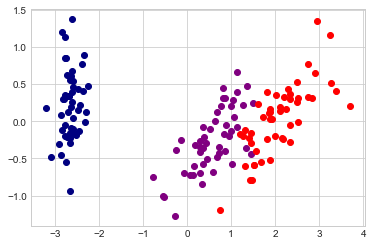

In [19]:
model = SparsePCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris= model.transform(iris)
plot_iris(transformed_iris, labels)

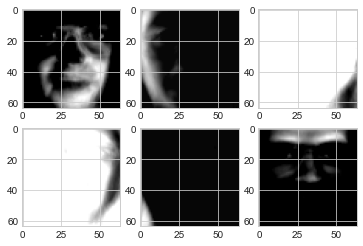

In [20]:
model = SparsePCA(n_components= 2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Truncated Singular Value Decomposition (Truncated SVD)

* PCA는 정방행렬에 대해서만 행렬 분해 가능
* SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능
* 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
* 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

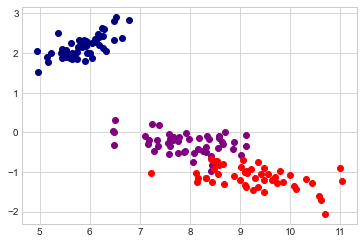

In [21]:
model = TruncatedSVD(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

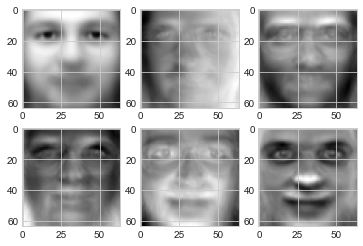

In [22]:
model =TruncatedSVD(n_components= 2*3, random_state=0)
model.fit(faces)
faces_components= model.components_
show_faces(faces_components)

## Dictionary Learning

* Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
* Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
* 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

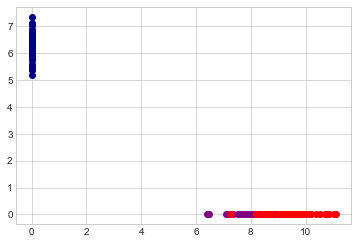

In [23]:
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

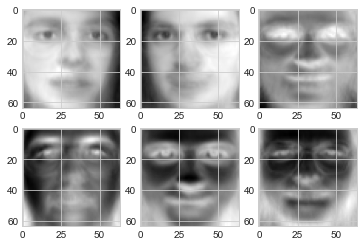

In [24]:
model = DictionaryLearning(n_components= 2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Factor Analysis

* 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
* 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
* PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려

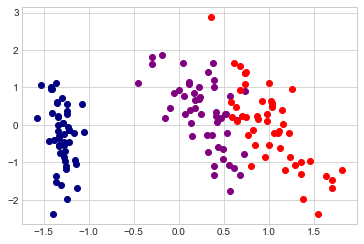

In [25]:
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

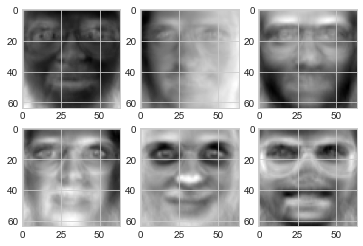

In [26]:
model = FactorAnalysis(n_components= 2*3, random_state=0)
model.fit(faces)
faces_components=model.components_
show_faces(faces_components)

## Independent Component Analysis(ICA)

* 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
* ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

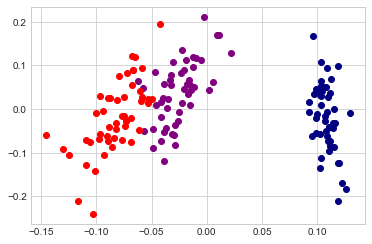

In [27]:
model = FastICA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

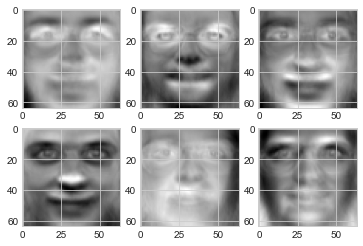

In [28]:
model = FastICA(n_components= 2*3, random_state=0)
model.fit(faces)
faces_components=model.components_
show_faces(faces_components)

## Non-negative Matrix Factorization

* 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


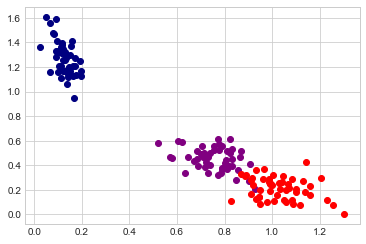

In [29]:
model = NMF(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


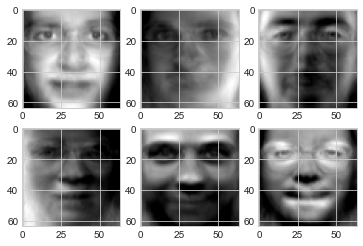

In [30]:
model = NMF(n_components= 2*3, random_state=0)
model.fit(faces)
faces_components=model.components_
show_faces(faces_components)

## Latent Dirichlet Allocation (LDA)

* 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
* 디리클레 분포에 따라 잠재적인 의미 구조를 파악


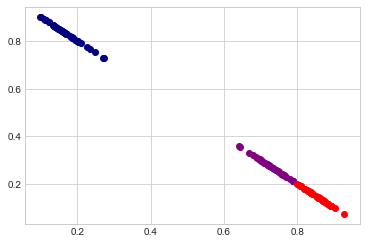

In [31]:
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

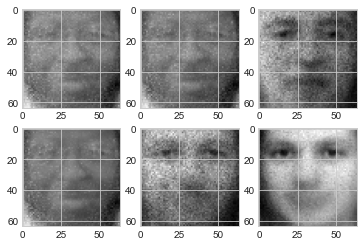

In [32]:
model = LatentDirichletAllocation(n_components= 2*3, random_state=0)
model.fit(faces)
faces_components=model.components_
show_faces(faces_components)

## Linear Discriminant Analysis (LDA)

* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
* LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소

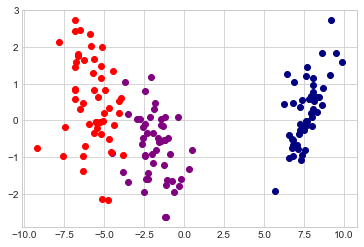

In [33]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습
* 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits


In [35]:
def min_max_scale(x):
    min_value, max_value = np.min(x,0), np.max(x,0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [36]:
def plot_digits(digits, labels):
    # min_max_scale 거친후
    digits = min_max_scale(digits)
    # 3d subplot 111(1개만)생성 
    ax = plt.subplot(111, projection='3d')
    #digits.shape를 본담에 그shape range만큼 레이블출력
    # 3차원이라서 총 3개
    for i in range(digits.shape[0]):
        ax.text(digits[i,0], digits[i,1], digits[i,2],
                str(labels[i]), color=plt.cm.Set1(labels[i] /10.),
                fontdict={'weight' : 'bold', 'size':9})
    ax.view_init(4, -72)

In [37]:
digits = load_digits()

In [38]:
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [39]:
# 64차원을 3차원으로 축소 
print(digits.data.shape)
print(decomposed_digits.shape)
print(decomposed_digits)

(1797, 64)
(1797, 3)
[[0.48392621 0.         1.24523916]
 [0.58296151 1.46767565 0.07150889]
 [0.61515883 1.10963211 0.38778201]
 ...
 [0.55272665 1.26056523 0.72094741]
 [0.7872562  0.27898731 1.04952031]
 [0.78507412 0.67250886 0.92677985]]


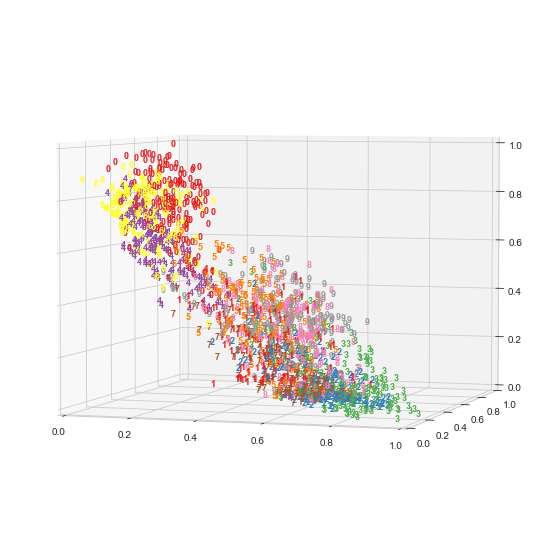

In [40]:
plt.figure(figsize=(20, 10))
plot_digits(decomposed_digits, digits.target)

### KNN

In [41]:
knn = KNeighborsClassifier()

In [42]:
score = cross_val_score(estimator=knn,
                        X=digits.data, y=digits.target,
                        cv=5
                       )
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [43]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.9627282575054161 (+/0 0.011168537355954218


In [44]:
score = cross_val_score(estimator=knn,
                        X=decomposed_digits, y=digits.target,
                        cv=5
                       )
score

array([0.54722222, 0.58055556, 0.64066852, 0.59610028, 0.56267409])

In [45]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.5854441349427422 (+/0 0.03214521445075084


### SVM

In [46]:
svm = SVC()

In [47]:
score = cross_val_score(estimator=svm,
                        X=digits.data, y=digits.target,
                        cv=5
                       )
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [48]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.9632838130609718 (+/0 0.02008605863225686


In [49]:
score = cross_val_score(estimator=svm,
                        X=decomposed_digits, y=digits.target,
                        cv=5
                       )
score

array([0.61388889, 0.62222222, 0.66016713, 0.60167131, 0.59888579])

In [50]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.6193670690188796 (+/0 0.022070024720937543


### Decision Tree

In [51]:
dtclf = DecisionTreeClassifier()

In [52]:
score = cross_val_score(estimator=dtclf,
                        X=digits.data, y=digits.target,
                        cv=5
                       )
score

array([0.77777778, 0.71388889, 0.79665738, 0.84679666, 0.7994429 ])

In [53]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.7869127205199629 (+/0 0.04302087121368182


In [54]:
score = cross_val_score(estimator=dtclf,
                        X=decomposed_digits, y=digits.target,
                        cv=5
                       )
score

array([0.58055556, 0.5       , 0.57938719, 0.59052925, 0.50417827])

In [55]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.5509300526152894 (+/0 0.04008783937116319


### Random Forest

In [56]:
rfclf = RandomForestClassifier()

In [57]:
score = cross_val_score(estimator=rfclf,
                        X=digits.data, y=digits.target,
                        cv=5
                       )
score

array([0.93611111, 0.89722222, 0.96657382, 0.96100279, 0.93314763])

In [58]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.938811513463324 (+/0 0.024626160377056158


In [59]:
score = cross_val_score(estimator=rfclf,
                        X=decomposed_digits, y=digits.target,
                        cv=5
                       )
score

array([0.58333333, 0.59166667, 0.64902507, 0.58774373, 0.57938719])

In [60]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.5982311977715877 (+/0 0.025729906857444088


## 복원된 표현을 사용한 학습
* 분해 후 복원된 행렬을 사용해 학습

In [61]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components
reconstructed_digits.shape

(1797, 64)

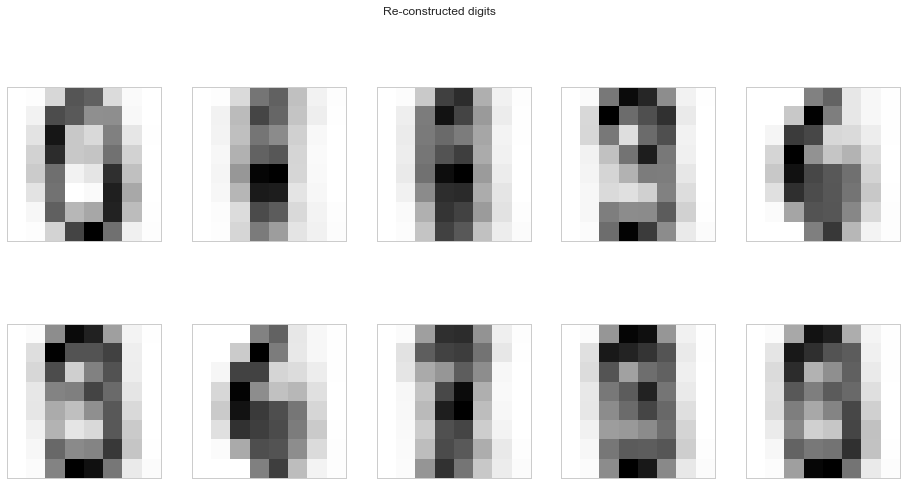

In [62]:
plt.figure(figsize=(16,8))
plt.suptitle('Re-constructed digits')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_digits[i].reshape(8, 8))

### KNN

In [63]:
score = cross_val_score(estimator=knn,
                        X=reconstructed_digits, y=digits.target,
                        cv=5
                       )
score

array([0.54166667, 0.59444444, 0.66295265, 0.57660167, 0.57381616])

In [64]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.5898963169297431 (+/0 0.04029722337499952


### SVM

In [65]:
score = cross_val_score(estimator=svm,
                        X=reconstructed_digits, y=digits.target,
                        cv=5
                       )
score

array([0.62777778, 0.60555556, 0.66016713, 0.61002786, 0.5821727 ])

In [66]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.6171402042711235 (+/0 0.025969174809053776


### Decision Tree

In [67]:
score = cross_val_score(estimator=dtclf,
                        X=reconstructed_digits, y=digits.target,
                        cv=5
                       )
score

array([0.56944444, 0.51111111, 0.55710306, 0.56824513, 0.5264624 ])

In [68]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.5464732281027546 (+/0 0.023518496722215513


### Random Forest

In [69]:
score = cross_val_score(estimator=rfclf,
                        X=reconstructed_digits, y=digits.target,
                        cv=5
                       )
score

array([0.58888889, 0.58333333, 0.62952646, 0.60724234, 0.57103064])

In [70]:
print('mean cross val score:{} (+/0 {}'.format(score.mean(), score.std()))
      

mean cross val score:0.5960043330238317 (+/0 0.020420063873090137


## 이미지 복원

In [71]:
train_faces, test_faces = train_test_split(faces, test_size=0.1)

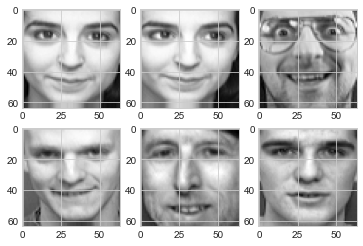

In [72]:
show_faces(train_faces)

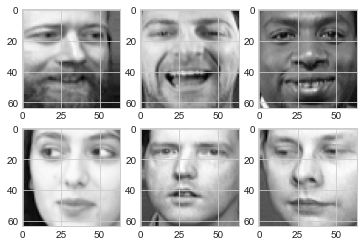

In [73]:
show_faces(test_faces)

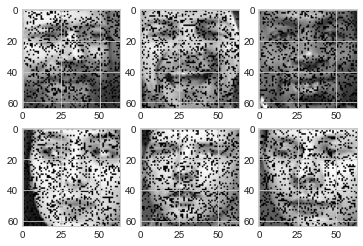

In [74]:
damaged_faces =[]
for face in test_faces:
    idx = np.random.choice(range(64 * 64), size=1024)
    damaged_face = face.copy()
    damaged_face[idx] = 0.
    damaged_faces.append(damaged_face)
show_faces(damaged_faces)

In [88]:
nmf = NMF(n_components=10)
nmf.fit(train_faces)

/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10)

In [98]:
matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

TypeError: H should have the same dtype as X. Got H.dtype = float32.

In [90]:
nmf = NMF(n_components=100)
nmf.fit(train_faces)

/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=100)

In [91]:
matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

TypeError: H should have the same dtype as X. Got H.dtype = float32.

In [77]:
nmf = NMF(n_components=300)
nmf.fit(train_faces)

/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=100)

In [81]:
matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

NotFittedError: This NMF instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.